## Importing packages
If you are working with a notebook, it is a good practice to import all the packages that you need at the top of the notebook. This will automatically give you a rough idea of what the notebook is about, and you will avoid random package imports throughout the notebook.

- Import the three packages you have used so far with their correct renaming conventions.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preparing the data frame again
Load the passwords again, and prepare the data frame with all the columns from yesterday. The index should contain the **unique** passwords and you should have the counts, the lengths, the digit sums, the number of alphabetic characters and the number of numeric characters in the data frame.

In [69]:
def load_passwords(path):
    # start with an empty list
    passwords = []
    # open the file
    with open(path) as f:
        # iterate over the lines in the file
        for line in f.readlines():
            # remove the newline character
            password = line.strip()
            # append non-empty passwords to the list
            if password:
                passwords.append(password)
    # return the list of passwords
    return passwords

In [70]:
# only implement the functions to get the lists of alphabetic characters since you can easily compute their lengths with the function len()
def get_alphabetic_characters(password):
    return [character for character in password if character.isalpha()]

def get_numeric_characters(password):
    return [int(character) for character in password if character.isnumeric()]

# use isalnum() which is equal to (isalpha() or isnumeric())
def get_special_characters(password):
    return [character for character in password if not character.isalnum()]

# use the function get_numeric_characters() to compute the digit sum
def compute_digit_sum(password):
    return sum(get_numeric_characters(password))

In [71]:
passwords = load_passwords("0001.txt")

In [72]:
# create a data frame with the unique passwords and the counts
df = pd.DataFrame(pd.Series(passwords).value_counts())

In [73]:
# add the length, the digit sum and the character counts
df["length"] = np.array([len(password) for password in df.index])
df["digit_sum"] = np.array([compute_digit_sum(password) for password in df.index])
df["n_alphabetic"] = np.array([len(get_alphabetic_characters(password)) for password in df.index])
df["n_numeric"] = np.array([len(get_numeric_characters(password)) for password in df.index])
df["n_special"] = np.array([len(get_special_characters(password)) for password in df.index])

## Computing the palindrome depth
A palindrome is a word/string that reads the same backwards as forwards, for example "radar" or "level". Instead of just checking all passwords whether they are a palindrome or not, the exercise is to count the number of matching characters up to the middle when reading the password backwards and forwards. If the number of characters is odd, you can include the middle character in the count. See the following examples to clarify how the palindrome depth is defined:
```
radar -> 3
12abcd21 -> 2
levels -> 0
```

- Write the function that computes the palindrome depth for a single password and calculate the depth for all passwords in your data frame.
- Identify the actual palindromes using the palindrome depths and the lengths of the passwords.
- Visualize your results and see if you can find anything interesting.

In [74]:
def palindrome_depth(password):
    """
    Since the password is checked forwards and backwards, you only have to
    iterate over half of the password length. The integer division // 2 is
    required to get an integer result. With a regular division the result
    would be a float that cannot be used in the function range().

    The for-loop is interrupted by the return statement as soon as it finds a
    character pair that is not equal. The current value of i will then be the
    palindrome depth. See the examples below to further illustrate this.

    If the length of the password is odd, the middle character does not have
    to be checked since this will contribute to the palindrome count in any
    case. This is only relevant if the for-loop is completed. In that case the
    palindrome depth should include the middle character in the count. E.g.
    the password "radar" is supposed to have the palindrome depth 3. You can
    achieve this by adding 1 to the password length before doing the integer
    division by 2. See a few examples (not in Python syntax!):
    length = 4 -> (4 + 1) // 2 = 2
    length = 5 -> (5 + 1) // 2 = 3
    length = 6 -> (6 + 1) // 2 = 3

    Example
    -------
    password = "radar"
    i = 0 -> "r" == "r"
    i = 1 -> "a" == "a"
    for loop is over -> return 3

    password = "12abcd21"
    i = 0 -> "1" == "1"
    i = 1 -> "2" == "2"
    i = 2 -> "a" != "d"
    return the current value of the index as the depth
    """
    for i in range(len(password) // 2):
        if password[i] != password[-1-i]:
            return i
    return (len(password) + 1) // 2

In [75]:
# continue with a copy of the basic data frame for this exercise, this is not required but the data frame would otherwise get quite wide over three exercises
df_palindrome = df.copy()

In [76]:
# add the column "palindrome_depth" to the data frame
df_palindrome["palindrome_depth"] = np.array([palindrome_depth(password) for password in df.index])

In [77]:
# add the boolean column "palindrome" by comparing the password "length" to the "palindrome_depth"
# the calculation (length + 1) // 2 is the same as the return value of the function palindrome_depth()
df_palindrome["palindrome"] = (df_palindrome["length"] + 1) // 2 == df_palindrome["palindrome_depth"]

In [78]:
# there are a little over 2000 true palindromes in the dataset
df_palindrome.query("palindrome")

,count,length,digit_sum,n_alphabetic,n_numeric,n_special,palindrome_depth,palindrome
111111,6993,6,6,0,6,0,3,True
000000,2288,6,0,0,6,0,3,True
11111,1408,5,5,0,5,0,3,True
222222,1380,6,12,0,6,0,3,True
666,1075,3,18,0,3,0,2,True
...,...,...,...,...,...,...,...,...
11411411,1,8,14,0,8,0,4,True
kekek,1,5,0,5,0,0,3,True
917719,1,6,34,0,6,0,3,True
868868,1,6,44,0,6,0,3,True


In [80]:
# only look at the passwords with a finite "palindrome_depth"
# save the partial data frame in a new variable since this will be used for all plots
df_plot = df_palindrome.query("palindrome_depth > 0")

In [116]:
# group the data by specific columns
group_length = df_plot.groupby("length")
group_alphabetic = df_plot.groupby("n_alphabetic")
group_numeric = df_plot.groupby("n_numeric")

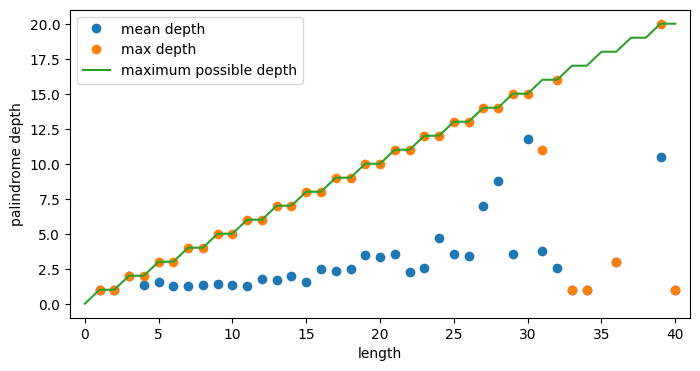

In [125]:
# there is a true palindrome in the data frame for every length up to 30
# the mean palindrome depth is quite constant as a function of the length, most passwords will only have a depth of 1 or 2 characters
# the increase of the palindrome_depth with the length is mostly due to passwords consisting of only a single unique character
fig, axs = plt.subplots(ncols=1, figsize=(8, 4))
group_length.mean().plot(y="palindrome_depth", marker="o", ls="none", label="mean depth", ax=axs)
group_length.max().plot(y="palindrome_depth", marker="o", ls="none", label="max depth", ax=axs)
axs.plot((np.arange(41) + 1) // 2, label="maximum possible depth")
axs.set_ylabel("palindrome depth")
axs.set_xlim(-1, 41)
axs.legend()

## Computing the password strength
The [password strength](https://en.wikipedia.org/wiki/Password_strength) estimates how many trials you need on average to crack a password using a brute-force approach. The equation for the information entropy is
$$
H = L \frac{\log{N}}{\log{2}}
$$
where $L$ is the length of the password and $N$ is number of possible symbols that depends on the set of symbols. If a passwords consists only of numeric characters, there will only be 10 possible symbols. On the other hand, if a password contains numeric characters and alphabetic characters the number of possible symbols will be higher. See the table on [Entropy per symbol](https://en.wikipedia.org/wiki/Password_strength#Random_passwords) for the relevant symbol sets.

- Identify the symbol set of a password. You should at least differentiate between the following three symbol sets:
    - Arabic numerals (0–9)
    - Case insensitive Latin alphabet (a–z or A–Z)
    - All ASCII printable characters (a-z, A-Z, 0-9 and special characters)
    - Use more symbol sets if you want to
- Write the function that computes the password strength of a single password based on the symbol set and the password length.
- Compute the password strength for each password in the data frame and add the result as a new column.
- Visualize your results and see if you can find anything interesting.

In [227]:
def password_strength(password):
    # get the lists with the three character categories
    numeric = get_numeric_characters(password)
    alphabetic = get_alphabetic_characters(password)
    special = get_special_characters(password)

    symbol_count = 0
    # there are 10 numeric characters
    if numeric:
        symbol_count += 10
    # there are 2*26 alphabetic characters (if you don't handle lower-case and upper-case characters separately)
    if alphabetic:
        symbol_count += 52
    # there should be 95 - 62 = 33 special characters
    if special:
        symbol_count += 33
    return len(password) * np.log2(symbol_count)

In [127]:
# continue with a copy of the basic data frame for this exercise, this is not required but the data frame would otherwise get quite wide over three exercises
df_strength = df.copy()

In [241]:
# add the password strength as a column to the data frame
df_strength["password_strength"] = np.array([password_strength(password) for password in df.index])
# add the relative password strength per character to the data frame
# I only realized that this is more interesting than the absolute password strength while trying to create some interesting plots
# it would have been better to only calculate the relative password strength with the function password_strength() in the first place
df_strength["relative_password_strength"] = df_strength["password_strength"] / df_strength["length"]

In [249]:
# remove the extreme lengths and only look at duplicate passwords
df_plot = df_strength.query("length < 50 and count > 1")

Text(0.5, 0.98, 'Password strength per character')

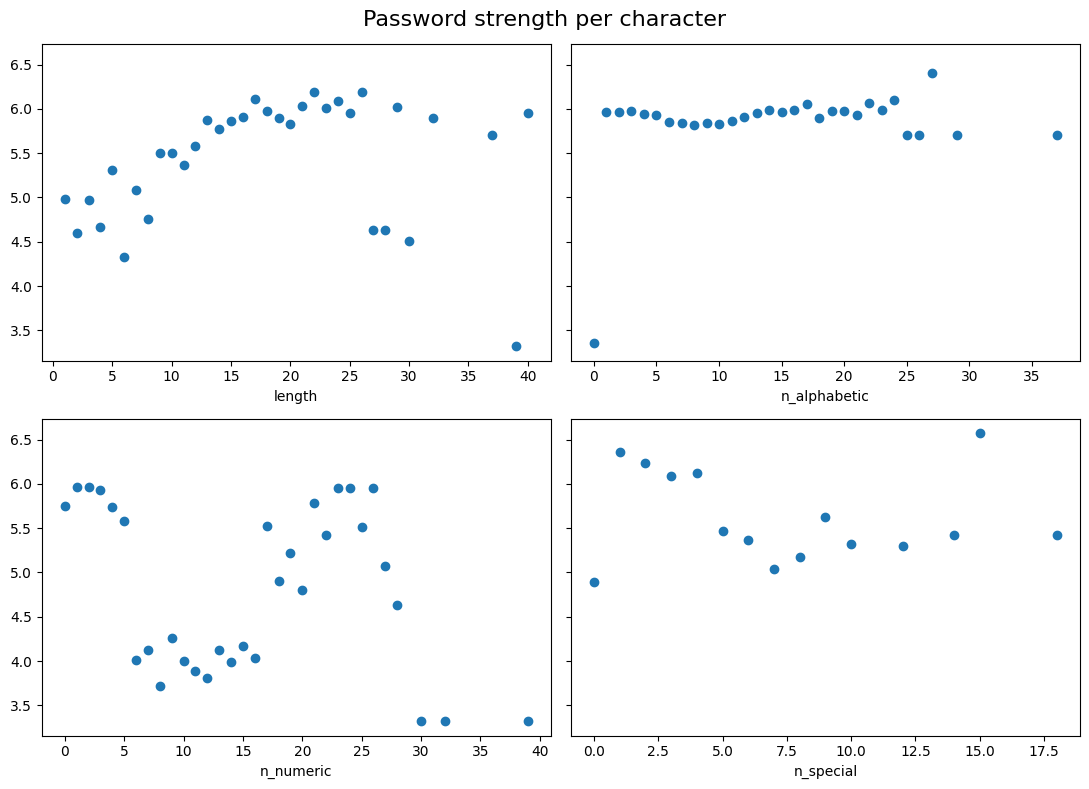

In [264]:
# up to ~20 characters the password strength per character still increases with the length because most passwords will contain all character types
# the password strength is practically constant as a function of n_alphabetic, only for n_alphabetic = 0 the value is significantly lower
# the password strength significantly drops for n_numeric between 6 and 16, most likely because these passwords will only consist of numeric characters
# the password strength is highest for n_special from 1 to 4 (the data point at n_special = 15 is only the average of two passwords)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 8), sharey=True)
fig.set_tight_layout(True)
df_plot.groupby("length").mean().plot(y="relative_password_strength", marker="o", linestyle="none", ax=axs[0,0], legend=False)
df_plot.groupby("n_alphabetic").mean().plot(y="relative_password_strength", marker="o", linestyle="none", ax=axs[0,1], legend=False)
df_plot.groupby("n_numeric").mean().plot(y="relative_password_strength", marker="o", linestyle="none", ax=axs[1,0], legend=False)
df_plot.groupby("n_special").mean().plot(y="relative_password_strength", marker="o", linestyle="none", ax=axs[1,1], legend=False)
fig.suptitle("Password strength per character", fontsize=16)

## Numeric character frequencies
For each passwords count the individual numeric characters. If a numeric character does not occur in a password, the count must be zero. See the following example as an illustration:
```python
password = "1234123459"
```
Represented as a dictionary the numeric character counts would be `{"0": 0, "1": 2, "2": 2, "3": 2, "4": 2, "5": 1, "6": 0, "7": 0, "8": 0, "9": 1}`.

- Write the function that counts the individual numeric characters in a single password.
- Get the counts from each password in the data frame and assign the data to the data frame. You need ten additional columns in the data frame, one for each numeric character.
- Visualize your results and see if you can find anything interesting.

In [156]:
# if you create a list of numeric characters and pass this to a pandas Series, you can just use the method .value_counts() to get the unique values and their counts
# I did not test how this compares to creating a dictionary with the characters and their counts (like you did on day1 and day2) in terms of runtime and memory load
def get_numeric_character_counts(password):
    series = pd.Series([char for char in password if char.isnumeric()]).value_counts()
    series.name = password # replace the name "count" by the value of password since this will be the index when all the series are combined into a single data frame
    return series

In [ ]:
# get a series with the numeric characters of each password and append them all to a list
# then create a data frame from the list of series
# WARNING: this might take a while to run!
df_numeric_characters = pd.DataFrame([get_numeric_character_counts(password) for password in df.index])

In [165]:
# if a numeric character was missing from the password the series returned from get_numeric_character_counts() will just not have this index
# in the data frame the empty columns for each password are filled with NaN (not a number)
# since we want these values to be zero we can use the method .fillna(0) to replace all NaN values with 0
# use the method .convert_dtypes() to convert everything to integer values again, the dtype was float earlier due to the NaN values
df_numeric_characters = df_numeric_characters.fillna(0).convert_dtypes()

In [198]:
# create a new data frame by joining the base data frame and the data frame with the numeric character counts
# since the two data frames have the same index and no duplicate columns, joining/combining works without any issues
df_numeric = df.join(df_numeric_characters)
df_numeric

,count,length,digit_sum,n_alphabetic,n_numeric,n_special,1,2,3,4,5,6,7,8,9,0
123456,18637,6,21,0,6,0,1,1,1,1,1,1,0,0,0,0
111111,6993,6,6,0,6,0,6,0,0,0,0,0,0,0,0,0
123456789,6579,9,45,0,9,0,1,1,1,1,1,1,1,1,1,0
123123,2731,6,12,0,6,0,2,2,2,0,0,0,0,0,0,0
000000,2288,6,0,0,6,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
www123141,1,9,12,3,6,0,3,1,1,1,0,0,0,0,0,0
A76886,1,6,35,1,5,0,0,0,0,0,0,2,1,2,0,0
352358908,1,9,43,0,9,0,0,1,2,0,2,0,0,2,1,1
jokefirst,1,9,0,9,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
# create a list with the labels of the numeric character columns for the plotting later
numeric_columns = [str(n) for n in range(10)]
numeric_columns

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Text(0.5, 1.05, 'Mean numeric character count of 739024 passwords')

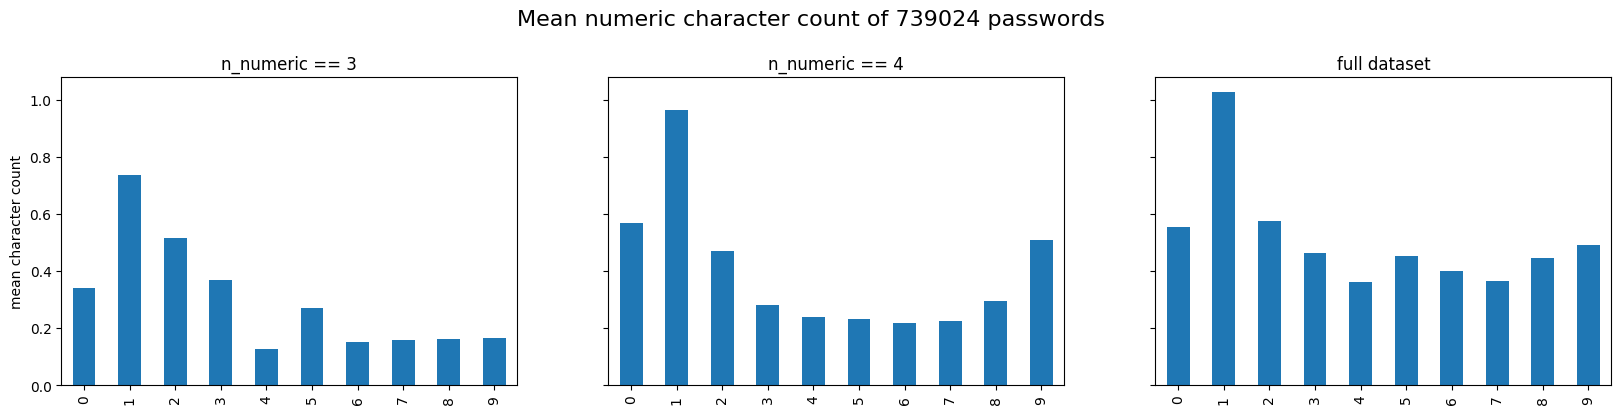

In [237]:
# the numeric character "1" is by far the most frequent one, this was to be expected
# if you only look at passwords with four numeric characters, the character "9" is quite common compared to "3"-"8". This could be due to years (e.g. year of birth) from the last century often being used in passwords.
fig, axs = plt.subplots(ncols=3, figsize=(20, 4), sharey=True)
query0 = "n_numeric == 3"
query1 = "n_numeric == 4"
df_numeric.query(query0).mean()[numeric_columns].plot(kind="bar", ax=axs[0])
df_numeric.query(query1).mean()[numeric_columns].plot(kind="bar", ax=axs[1])
df_numeric.mean()[numeric_columns].plot(kind="bar", ax=axs[2])

axs[0].set_title(query0)
axs[1].set_title(query1)
axs[2].set_title("full dataset")
axs[0].set_ylabel("mean character count")
fig.suptitle(f"Mean numeric character count of {len(df_numeric)} passwords", fontsize=16, y=1.05)